## Import required Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pprint import pprint
from tqdm import tqdm

## Load data

In [2]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (122289, 1044)
shape of X_test:  (60232, 1044)
shape of Y_train:  (122289, 5)
shape of Y_test:  (60232, 5)


## Tuning

In [3]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

Use random gird to get some params

In [14]:
# Create the random grid
random_grid = {'n_estimators': list(range(50,500,5)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(2,150,2)),
               'min_samples_split': [2,3,5,7,11,13,17,19],
               'min_samples_leaf': [1, 2, 4,6,8,10,20,30,40,50],
               'bootstrap': [True, False],
               'criterion': ["gini", "entropy"]}
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [2,
               4,
               6,
               8,
               10,
               12,
               14,
               16,
               18,
               20,
               22,
               24,
               26,
               28,
               30,
               32,
               34,
               36,
               38,
               40,
               42,
               44,
               46,
               48,
               50,
               52,
               54,
               56,
               58,
               60,
               62,
               64,
               66,
               68,
               70,
               72,
               74,
               76,
               78,
               80,
               82,
               84,
               86,
               88,
               90,
               92,
               94,
               96,
               98,
         

In [15]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)

In [16]:
%%time
rf_random.fit(X_train[:20000], y_train[:20000])

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 18min 11s


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, 32, 34, 36, 38,
                                                      40, 42, 44, 46, 48, 50,
                                                      52, 54, 56, 58, 60, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             20, 30, 40, 50],
                                        'min_samples_split': [2, 3, 5, 7, 11,
                                                              13, 17, 19],
                                        'n_estimators': [50, 55, 60, 65, 70, 75,
                                                         80, 85, 90, 95, 100,
                                                         105, 110, 115, 120,
                                                         125, 130, 135, 140,
                                                         145, 150, 155, 160,
                                                         165, 170, 175, 180,
                                                         185, 190, 195, ...]},
                   random_state=42, verbose=2)

In [18]:
score_df = pd.DataFrame(rf_random.cv_results_)
score_df.sort_values(by=['rank_test_score'], ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,33.719624,1.174141,0.617840,0.051669,90,19,2,sqrt,122,gini,False,"{'n_estimators': 90, 'min_samples_split': 19, ...",0.6416,0.6488,0.6510,0.6374,0.64470,0.005464,1
85,148.230737,5.142424,2.883075,0.216675,445,17,2,sqrt,92,entropy,False,"{'n_estimators': 445, 'min_samples_split': 17,...",0.6450,0.6488,0.6490,0.6354,0.64455,0.005518,2
43,170.796550,4.944538,3.483998,0.176174,495,3,2,sqrt,134,entropy,False,"{'n_estimators': 495, 'min_samples_split': 3, ...",0.6440,0.6500,0.6438,0.6346,0.64310,0.005504,3
0,34.776253,1.823545,1.011561,0.058326,165,2,2,sqrt,88,entropy,True,"{'n_estimators': 165, 'min_samples_split': 2, ...",0.6380,0.6496,0.6474,0.6304,0.64135,0.007678,4
62,84.063844,0.881883,2.532242,0.129367,430,17,2,auto,36,entropy,True,"{'n_estimators': 430, 'min_samples_split': 17,...",0.6388,0.6464,0.6442,0.6318,0.64030,0.005633,5


In [19]:
score_df.sort_values(by=['rank_test_score'], ascending=True).reset_index().loc[0,'params']

{'n_estimators': 90,
 'min_samples_split': 19,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 122,
 'criterion': 'gini',
 'bootstrap': False}

In [20]:
score_df.sort_values(by=['rank_test_score'], ascending=True).reset_index().loc[1,'params']

{'n_estimators': 445,
 'min_samples_split': 17,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 92,
 'criterion': 'entropy',
 'bootstrap': False}

with the result, we can try to get a more accurate parameter range for grid search

In [21]:
sorted_score_df = score_df.sort_values(by=['rank_test_score'], ascending=True).reset_index()

In [32]:
# Get top 10 parameters
df_top_10 = pd.DataFrame(list(sorted_score_df.loc[:9,'params']))
df_top_10

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,criterion,bootstrap
0,90,19,2,sqrt,122,gini,False
1,445,17,2,sqrt,92,entropy,False
2,495,3,2,sqrt,134,entropy,False
3,165,2,2,sqrt,88,entropy,True
4,430,17,2,auto,36,entropy,True
5,365,19,2,auto,26,gini,False
6,85,19,2,auto,28,entropy,False
7,90,17,4,sqrt,42,gini,False
8,260,5,4,sqrt,128,gini,False
9,295,2,4,sqrt,60,gini,False


In [42]:
print("n_estimator:")
print("  min:",df_top_10['n_estimators'].min(),"max:",df_top_10['n_estimators'].max())
print("min_samples_split:")
print("  min:",df_top_10['min_samples_split'].min(),"max:",df_top_10['min_samples_split'].max())
print("min_samples_leaf:")
print("  min:",df_top_10['min_samples_leaf'].min(),"max:",df_top_10['min_samples_leaf'].max())
print("max_features")
print(df_top_10["criterion"].value_counts())
print("max_depth:")
print("  min:",df_top_10['max_depth'].min(),"max:",df_top_10['max_depth'].max())
print("criterion")
print(df_top_10["criterion"].value_counts())
print("bootstrap")
print(df_top_10["bootstrap"].value_counts())

n_estimator:
  min: 85 max: 495
min_samples_split:
  min: 2 max: 19
min_samples_leaf:
  min: 2 max: 4
max_features
gini       5
entropy    5
Name: criterion, dtype: int64
max_depth:
  min: 26 max: 134
criterion
gini       5
entropy    5
Name: criterion, dtype: int64
bootstrap
False    8
True     2
Name: bootstrap, dtype: int64


In [49]:
# Create a new grid
params_grid = {'n_estimators': list(range(85 ,495,164)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(26 ,134,36)),
               'min_samples_split': [2,3,17,19],
               'min_samples_leaf': [2,4],
               'bootstrap': [False],
               'criterion': ["gini", "entropy"]}
pprint(params_grid)

{'bootstrap': [False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [26, 62, 98],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 3, 17, 19],
 'n_estimators': [85, 249, 413]}


In [51]:
rf_grid = GridSearchCV(estimator=rf, 
                           param_grid=params_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring = "accuracy")

In [52]:
%%time
rf_grid.fit(X_train[:10000], y_train[:10000])

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\bobmst\.conda\envs\ds310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Wall time: 41min 24s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini', 'entropy'],
                         'max_depth': [26, 62, 98],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 3, 17, 19],
                         'n_estimators': [85, 249, 413]},
             scoring='accuracy', verbose=2)

In [53]:
score_df = pd.DataFrame(rf_random.cv_results_)
score_df.sort_values(by=['rank_test_score'], ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,33.719624,1.174141,0.617840,0.051669,90,19,2,sqrt,122,gini,False,"{'n_estimators': 90, 'min_samples_split': 19, ...",0.6416,0.6488,0.6510,0.6374,0.64470,0.005464,1
85,148.230737,5.142424,2.883075,0.216675,445,17,2,sqrt,92,entropy,False,"{'n_estimators': 445, 'min_samples_split': 17,...",0.6450,0.6488,0.6490,0.6354,0.64455,0.005518,2
43,170.796550,4.944538,3.483998,0.176174,495,3,2,sqrt,134,entropy,False,"{'n_estimators': 495, 'min_samples_split': 3, ...",0.6440,0.6500,0.6438,0.6346,0.64310,0.005504,3
0,34.776253,1.823545,1.011561,0.058326,165,2,2,sqrt,88,entropy,True,"{'n_estimators': 165, 'min_samples_split': 2, ...",0.6380,0.6496,0.6474,0.6304,0.64135,0.007678,4
62,84.063844,0.881883,2.532242,0.129367,430,17,2,auto,36,entropy,True,"{'n_estimators': 430, 'min_samples_split': 17,...",0.6388,0.6464,0.6442,0.6318,0.64030,0.005633,5


In [62]:
params_best = score_df.sort_values(by=['rank_test_score'], ascending=True).reset_index().loc[0,'params']
params_best

{'n_estimators': 90,
 'min_samples_split': 19,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 122,
 'criterion': 'gini',
 'bootstrap': False}

In [61]:
score_df.sort_values(by=['rank_test_score'], ascending=True).reset_index().loc[1,'params']

{'n_estimators': 445,
 'min_samples_split': 17,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 92,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
clf = RandomForestClassifier(
    random_state = 42,
    n_estimators = 445,
    min_samples_split = 17,
    min_samples_leaf = 2
    max_features='sqrt',
    max_depth=92,
    criterion='entropy',
    bootstrap=False)
clf.fit(X_train, y_train)
clf

## Train the model

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [58]:
clf = RandomForestClassifier(random_state=42,n_estimators = 90,min_samples_split = 19,min_samples_leaf = 2,max_features='sqrt',max_depth=122,criterion='gini',bootstrap=False)
clf.fit(X_train, y_train)
clf

RandomForestClassifier(bootstrap=False, max_depth=122, min_samples_leaf=2,
                       min_samples_split=19, n_estimators=90, random_state=42)

## predictions and evaluation

In [12]:
# Old result
clf_regular = RandomForestClassifier(random_state=42,max_depth=100)
predictions = clf_regular.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


0.6741190355757882
              precision    recall  f1-score   support

           0       0.58      0.55      0.57     35586
           1       0.84      0.73      0.78     35586
           2       0.90      0.80      0.85     35586
           3       0.75      0.70      0.73     35586
           4       0.54      0.58      0.56     35586

   micro avg       0.71      0.67      0.69    177930
   macro avg       0.72      0.67      0.70    177930
weighted avg       0.72      0.67      0.70    177930
 samples avg       0.67      0.67      0.67    177930



c:\Users\bobmst\.conda\envs\ds310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


0.6583937503512617
              precision    recall  f1-score   support

           0       0.73      0.46      0.57     35586
           1       0.85      0.77      0.81     35586
           2       0.92      0.89      0.90     35586
           3       0.79      0.72      0.75     35586
           4       0.68      0.45      0.54     35586

   micro avg       0.81      0.66      0.73    177930
   macro avg       0.79      0.66      0.72    177930
weighted avg       0.79      0.66      0.72    177930
 samples avg       0.66      0.66      0.66    177930



c:\Users\bobmst\.conda\envs\ds310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Old accuracy with 100 depth: 0.6741190355757882

New accuracy with hyperparameter tuning: 0.6583937503512617

Even the accuracy is similar to the the decision tree classifier model, the precision imporved a lot with random forest

The decisiontree's accuracy goes to 78 at depth 20. And the trend is still going up, we will try more depth now.

In [64]:
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
matrix

array([[25252,  2202,  1669,  2256,  4207],
       [ 7782, 27169,    80,   143,   412],
       [ 2593,    30, 31271,  1479,   213],
       [ 7258,   307,    14, 25456,  2551],
       [13675,  2054,  1021,  2920, 15916]], dtype=int64)

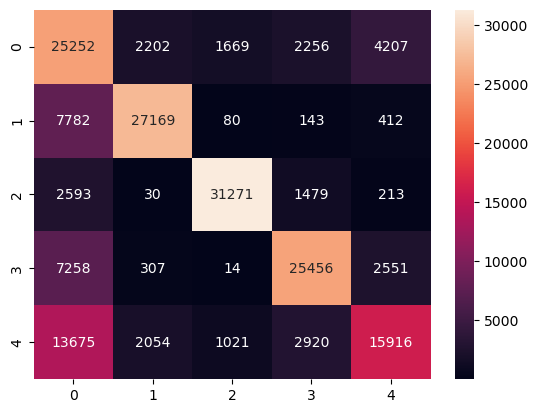

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()